In [1]:
import os
import numpy as np
import lmfit
import csv
import matplotlib.pyplot as plt

In [11]:

def write_csv(filepath, series):
    with open(filepath, 'w') as csv_out:
        writer = csv.writer(csv_out)
        writer.writerow(series.keys())
        writer.writerows(zip(*series.values()))
        
def series_append(series, list, keys):
    for i in range(64):
        series[keys[i]].append(float(list[i]))
    return series

def load_series(filename):
    with open(filename, 'r') as csv_in:
        csv_file = list(csv.reader(csv_in))
        series = {}
        keys = csv_file[0]
        for key in keys: series[key] = []
        for i in range(2, len(csv_file), 2):
            series = series_append(series, csv_file[i], keys)
        return [series, int((len(csv_file) - 2) / 2)]

In [12]:
raw_filepath = '..\\time_series\\Time_normalized_stages\\1_unprocessed\\'
raw_files = os.listdir(raw_filepath)

smoothed_filepath = '..\\time_series\\Time_normalized_stages\\2_smoothed\\'
smoothed_files = os.listdir(smoothed_filepath)

trans_filepath = '..\\time_series\\Time_normalized_stages\\3_translation\\'
trans_files = os.listdir(trans_filepath)

final_filepath = '..\\time_series\\Time_normalized_stages\\4_final\\'
final_files = os.listdir(final_filepath)

# disabled for security

'''

for file in raw_files:
    series, num_frames = load_series(raw_filepath + file)
    for key in series:
        series[key] = [x / 1000 for x in series[key]]
    write_csv(raw_filepath + file, series)

for file in smoothed_files:
    series, num_frames = load_series(smoothed_filepath + file)
    for key in series:
        series[key] = [x / 1000 for x in series[key]]
    write_csv(smoothed_filepath + file, series)

for file in trans_files:
    series, num_frames = load_series(trans_filepath + file)
    for key in series:
        series[key] = [x / 1000 for x in series[key]]
    write_csv(trans_filepath + file, series)

for file in final_files:
    series, num_frames = load_series(final_filepath + file)
    for key in series:
        series[key] = [x / 1000 for x in series[key]]
    write_csv(final_filepath + file, series)

'''

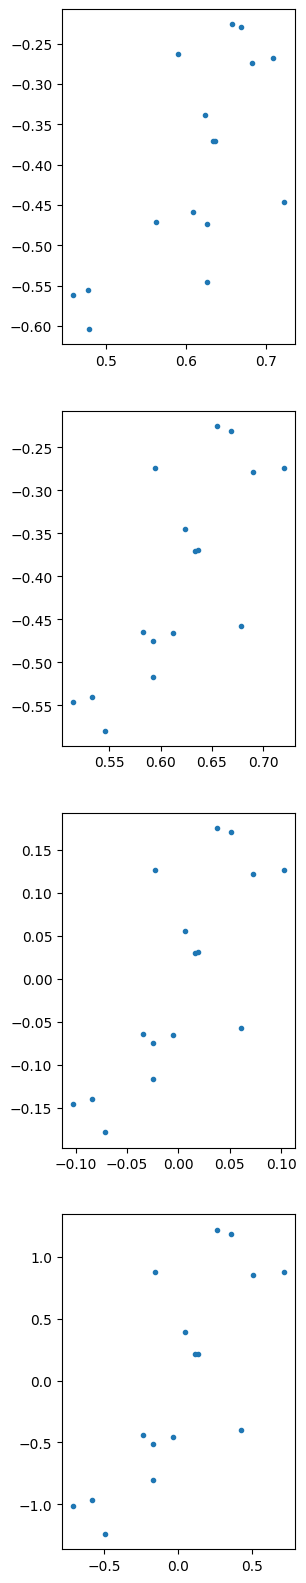

In [16]:
filename = raw_files[362]

fig, ax = plt.subplots(4, figsize=(3, 20))

raw_series, num_frames = load_series(raw_filepath + filename)
smoothed_series, num_frames = load_series(smoothed_filepath + filename)
trans_series, num_frames = load_series(trans_filepath + filename)
final_series, num_frames = load_series(final_filepath + filename)

raw_x = []
raw_y = []
smooth_x = []
smooth_y = []
trans_x = []
trans_y = []
final_x = []
final_y = []

for key in raw_series:
    if (key[-1] == 'x'):
        raw_x.append(raw_series[key][4])
    elif (key[-1] == 'y'):
        raw_y.append(raw_series[key][4])

for key in smoothed_series:
    if (key[-1] == 'x'):
        smooth_x.append(smoothed_series[key][4])
    elif (key[-1] == 'y'):
        smooth_y.append(smoothed_series[key][4])

for key in trans_series:
    if (key[-1] == 'x'):
        trans_x.append(trans_series[key][4])
    elif (key[-1] == 'y'):
        trans_y.append(trans_series[key][4])

for key in final_series:
    if (key[-1] == 'x'):
        final_x.append(final_series[key][4])
    elif (key[-1] == 'y'):
        final_y.append(final_series[key][4])

ax[0].plot(raw_x, raw_y, '.')
ax[1].plot(smooth_x, smooth_y, '.')
ax[2].plot(trans_x, trans_y, '.')
ax[3].plot(final_x, final_y, '.')
